In [ ]:
!pip install monai nibabel scikit-image timm torchio

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("loco159/brats2020-small-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.57G/1.57G [00:21<00:00, 78.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/loco159/brats2020-small-dataset/versions/1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader


In [ ]:
train_images_dir = "/root/.cache/kagglehub/datasets/loco159/brats2020-small-dataset/versions/1/dataset/train/images"
train_masks_dir  = "/root/.cache/kagglehub/datasets/loco159/brats2020-small-dataset/versions/1/dataset/train/masks"

val_images_dir   = "/root/.cache/kagglehub/datasets/loco159/brats2020-small-dataset/versions/1/dataset/val/images"
val_masks_dir    = "/root/.cache/kagglehub/datasets/loco159/brats2020-small-dataset/versions/1/dataset/val/masks"


In [ ]:
class NPY3DDataset(Dataset):
    def __init__(self, image_dir, mask_dir):
        self.image_paths = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(".npy")])
        self.mask_paths = sorted([os.path.join(mask_dir, f) for f in os.listdir(mask_dir) if f.endswith(".npy")])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = np.load(self.image_paths[idx])  # shape: (128,128,128,3)
        mask = np.load(self.mask_paths[idx])    # shape: (128,128,128,4)

        # Reduce dimensions if needed
        if image.ndim == 4:
            image = image[..., 0]  # take only 1 channel

        if mask.ndim == 4:
            mask = np.argmax(mask, axis=-1)  # convert one-hot to label map

        image = torch.tensor(image, dtype=torch.float32).unsqueeze(0)  # shape: [1, D, H, W]
        mask = torch.tensor(mask, dtype=torch.long)

        return {"image": image, "label": mask}


In [ ]:
train_images_dir = "/content/drive/MyDrive/BraTS2020_Small/dataset/train/images"
train_masks_dir  = "/content/drive/MyDrive/BraTS2020_Small/dataset/train/masks"

val_images_dir   = "/content/drive/MyDrive/BraTS2020_Small/dataset/val/images"
val_masks_dir    = "/content/drive/MyDrive/BraTS2020_Small/dataset/val/masks"


In [ ]:
train_dataset = NPY3DDataset(train_images_dir, train_masks_dir)
val_dataset   = NPY3DDataset(val_images_dir, val_masks_dir)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)


In [ ]:
sample = next(iter(train_loader))
print("✅ Image shape:", sample["image"].shape)
print("✅ Label shape:", sample["label"].shape)


✅ Image shape: torch.Size([1, 1, 128, 128, 128])
✅ Label shape: torch.Size([1, 128, 128, 128])


In [ ]:
class NPY3DDataset(Dataset):
    def __init__(self, image_dir, mask_dir):
        self.image_paths = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(".npy")])
        self.mask_paths = sorted([os.path.join(mask_dir, f) for f in os.listdir(mask_dir) if f.endswith(".npy")])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = np.load(self.image_paths[idx])  # shape: [D, H, W, 3]
        mask = np.load(self.mask_paths[idx])    # shape: [D, H, W, 4]

        if image.ndim == 4:
            image = image[..., 0]  # Keep first channel

        if mask.ndim == 4:
            mask = np.argmax(mask, axis=-1)  # One-hot to label map

        image = torch.tensor(image, dtype=torch.float32).unsqueeze(0)  # shape: [1, D, H, W]
        mask = torch.tensor(mask, dtype=torch.long)

        return {"image": image, "label": mask}


[link text](https://)**Build & Train UNETR**

In [ ]:
!pip install --upgrade numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 76.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
monai 1.4.0 requires numpy<2.0,>=1.24, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.


In [ ]:
!pip install --upgrade monai

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
!pip install monai nibabel torch torchvision


In [ ]:
from monai.networks.nets import UNETR


In [ ]:
!pip install numpy==1.23.5
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 55.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
monai 1.4.0 requires numpy<2.0,>=1.24, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5

Looking in indexes: https://download.pytorch.org/whl/cpu
^C


In [ ]:
!pip uninstall -y numpy monai torch torchvision
!pip install numpy==1.23.5
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu



^C
^C
^C


In [ ]:
!pip install monai

In [ ]:
from monai.networks.nets import UNETR
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = UNETR(
    in_channels=1,
    out_channels=2,
    img_size=(128, 128, 128),
    feature_size=16,
    hidden_size=768,
    mlp_dim=3072,
    num_heads=12,
    norm_name='instance',
    res_block=True,
    dropout_rate=0.1,
).to(device)


In [ ]:
from monai.losses import DiceCELoss

loss_function = DiceCELoss(to_onehot_y=True, softmax=True)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


In [ ]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset

class NPY3DDataset(Dataset):
    def __init__(self, image_dir, mask_dir):
        self.image_paths = sorted([
            os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(".npy")
        ])
        self.mask_paths = sorted([
            os.path.join(mask_dir, f) for f in os.listdir(mask_dir) if f.endswith(".npy")
        ])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = np.load(self.image_paths[idx])  # Shape: (128, 128, 128, 3)
        mask = np.load(self.mask_paths[idx])    # Shape: (128, 128, 128, 4)

        # Use one channel (e.g., FLAIR)
        if image.ndim == 4:
            image = image[..., 0]  # shape: (128, 128, 128)

        # Convert one-hot mask to binary
        if mask.ndim == 4:
            mask = np.argmax(mask, axis=-1)

        mask = np.where(mask > 0, 1, 0).astype(np.uint8)

        # Convert to torch tensors
        image = torch.tensor(image, dtype=torch.float32).unsqueeze(0)  # [1, D, H, W]
        mask = torch.tensor(mask, dtype=torch.long)                   # [D, H, W]

        return {"image": image, "label": mask}


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_images_dir = "/content/drive/MyDrive/BraTS2020_Small/dataset/train/images"
train_masks_dir  = "/content/drive/MyDrive/BraTS2020_Small/dataset/train/masks"

val_images_dir   = "/content/drive/MyDrive/BraTS2020_Small/dataset/val/images"
val_masks_dir    = "/content/drive/MyDrive/BraTS2020_Small/dataset/val/masks"



In [ ]:
train_dataset = NPY3DDataset(train_images_dir, train_masks_dir)
val_dataset = NPY3DDataset(val_images_dir, val_masks_dir)


In [ ]:
train_dataset = NPY3DDataset(train_images_dir, train_masks_dir)

from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)


In [ ]:
class NPY3DDataset(Dataset):
    def __init__(self, image_dir, mask_dir):
        self.image_paths = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(".npy")])
        self.mask_paths = sorted([os.path.join(mask_dir, f) for f in os.listdir(mask_dir) if f.endswith(".npy")])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = np.load(self.image_paths[idx])  # shape: (128,128,128,3)
        mask = np.load(self.mask_paths[idx])    # shape: (128,128,128,4)

        image = image[..., 0] if image.ndim == 4 else image
        mask = np.argmax(mask, axis=-1) if mask.ndim == 4 else mask

        image = torch.tensor(image, dtype=torch.float32).unsqueeze(0)
        mask = torch.tensor(mask, dtype=torch.long)

        return {"image": image, "label": mask}


In [ ]:
for batch in train_loader:
    lbl = batch["label"]
    print("Label unique values:", torch.unique(lbl))
    break



Label unique values: tensor([0, 1])


In [ ]:
class NPY3DDataset(Dataset):
    def __init__(self, image_dir, mask_dir):
        self.image_paths = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(".npy")])
        self.mask_paths = sorted([os.path.join(mask_dir, f) for f in os.listdir(mask_dir) if f.endswith(".npy")])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = np.load(self.image_paths[idx])  # shape: (128,128,128,3)
        mask = np.load(self.mask_paths[idx])    # shape: (128,128,128,4)

        # 🧠 Keep only the first channel (e.g. FLAIR)
        if image.ndim == 4:
            image = image[..., 0]  # -> (128,128,128)

        # 🧠 Convert one-hot to class map
        if mask.ndim == 4:
            mask = np.argmax(mask, axis=-1)  # -> (128,128,128)

        # ✅ Binary segmentation: all tumor labels become 1, background = 0
        mask = np.where(mask > 0, 1, 0)

        # Convert to torch tensors
        image = torch.tensor(image, dtype=torch.float32).unsqueeze(0)  # shape: [1, D, H, W]
        mask = torch.tensor(mask, dtype=torch.long)  # shape: [D, H, W]

        return {"image": image, "label": mask}



In [ ]:
model.eval()


UNETR(
  (vit): ViT(
    (patch_embedding): PatchEmbeddingBlock(
      (patch_embeddings): Conv3d(1, 768, kernel_size=(16, 16, 16), stride=(16, 16, 16))
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (blocks): ModuleList(
      (0-11): 12 x TransformerBlock(
        (mlp): MLPBlock(
          (linear1): Linear(in_features=768, out_features=3072, bias=True)
          (linear2): Linear(in_features=3072, out_features=768, bias=True)
          (fn): GELU(approximate='none')
          (drop1): Dropout(p=0.1, inplace=False)
          (drop2): Dropout(p=0.1, inplace=False)
        )
        (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): SABlock(
          (out_proj): Linear(in_features=768, out_features=768, bias=True)
          (qkv): Linear(in_features=768, out_features=2304, bias=False)
          (to_q): Identity()
          (to_k): Identity()
          (to_v): Identity()
          (input_rearrange): Rearrange('b h (qkv l d) -> qkv b l h d', qkv=3,

In [ ]:
from sklearn.metrics import f1_score
from monai.metrics import DiceMetric
import numpy as np

# Initialize metrics
dice_metric = DiceMetric(include_background=True, reduction="mean")
all_preds = []
all_labels = []

# Validation loop
with torch.no_grad():
    for images, labels in val_loader:  # Unpack tuple (images, masks)
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)  # [B, 2, D, H, W]
        preds = torch.argmax(outputs, dim=1)  # [B, D, H, W]

        # Add to metric
        dice_metric(y_pred=preds.unsqueeze(1), y=labels.unsqueeze(1))

        # For F1 score
        all_preds.append(preds.cpu().numpy().flatten())
        all_labels.append(labels.cpu().numpy().flatten())

# Final metrics
dice_score = dice_metric.aggregate().item()
f1 = f1_score(np.concatenate(all_labels), np.concatenate(all_preds))

print(f"🎯 Dice Score: {dice_score:.4f}")
print(f"🎯 F1 Score:   {f1:.4f}")

AttributeError: 'str' object has no attribute 'to'

In [ ]:
class NPY3DDataset(Dataset):
    def __init__(self, root_dir, split='train', transform=None):
        self.root_dir = root_dir
        self.split = split
        self.transform = transform

        self.image_dir = os.path.join(root_dir, split, 'images')
        self.mask_dir = os.path.join(root_dir, split, 'masks')
        self.image_files = sorted(os.listdir(self.image_dir))
        self.mask_files = sorted(os.listdir(self.mask_dir))

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_files[idx])
        mask_path = os.path.join(self.mask_dir, self.mask_files[idx])

        # Load image and mask
        try:
            image = np.load(img_path)  # Shape: (128, 128, 128, 3)
            mask = np.load(mask_path)  # Shape: (128, 128, 128, 4)
        except Exception as e:
            print(f"Error loading file: {img_path} or {mask_path}")
            raise e

        # Extract single channel from image
        image = image[..., 0]  # Shape: (128, 128, 128)

        # Convert one-hot encoded mask to binary mask
        mask = np.argmax(mask, axis=-1)  # Shape: (128, 128, 128)
        mask = (mask > 0).astype(np.int64)  # Binary mask: 1 for tumor, 0 otherwise

        # Add channel dimension to image and mask
        image = image[np.newaxis, ...]  # Shape: (1, 128, 128, 128)
        mask = mask[np.newaxis, ...]  # Shape: (1, 128, 128, 128)

        # Convert to PyTorch tensors
        image = torch.tensor(image, dtype=torch.float32)
        mask = torch.tensor(mask, dtype=torch.long)

        if self.transform:
            image, mask = self.transform(image, mask)

        # Debugging: Print types
        print(f"Image type: {type(image)}, Mask type: {type(mask)}")

        return image, mask

In [ ]:
def __init__(self, root_dir, split='train', transform=None):
    self.root_dir = root_dir
    self.split = split
    self.transform = transform

    self.image_dir = os.path.join(root_dir, split, 'images')
    self.mask_dir = os.path.join(root_dir, split, 'masks')
    self.image_files = sorted(os.listdir(self.image_dir))
    self.mask_files = sorted(os.listdir(self.mask_dir))

    # Check that the number of images and masks match
    if len(self.image_files) != len(self.mask_files):
        raise ValueError("Mismatch between the number of images and masks.")

In [ ]:
val_loader = DataLoader(
    val_dataset,
    batch_size=2,
    shuffle=False,
    num_workers=0  # Set to 0 for debugging
)

In [ ]:
with torch.no_grad():
    for batch in val_loader:
        images, labels = batch  # Unpack tuple (images, masks)

        # Debugging: Print types
        print(f"Images type: {type(images)}, Labels type: {type(labels)}")

        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)  # [B, 2, D, H, W]
        preds = torch.argmax(outputs, dim=1)  # [B, D, H, W]

        # Add to metric
        dice_metric(y_pred=preds.unsqueeze(1), y=labels.unsqueeze(1))

        # For F1 score
        all_preds.append(preds.cpu().numpy().flatten())
        all_labels.append(labels.cpu().numpy().flatten())

Images type: <class 'str'>, Labels type: <class 'str'>


AttributeError: 'str' object has no attribute 'to'

In [ ]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset

class NPY3DDataset(Dataset):
    def __init__(self, root_dir, split='train', transform=None):
        self.root_dir = root_dir
        self.split = split
        self.transform = transform

        # Paths to image and mask directories
        self.image_dir = os.path.join(root_dir, split, 'images')
        self.mask_dir = os.path.join(root_dir, split, 'masks')

        # List all files in the directories
        self.image_files = sorted(os.listdir(self.image_dir))
        self.mask_files = sorted(os.listdir(self.mask_dir))

        # Check that the number of images and masks match
        if len(self.image_files) != len(self.mask_files):
            raise ValueError("Mismatch between the number of images and masks.")

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_files[idx])
        mask_path = os.path.join(self.mask_dir, self.mask_files[idx])

        try:
            # Load .npy files
            image = np.load(img_path)  # Shape: (128, 128, 128, 3)
            mask = np.load(mask_path)  # Shape: (128, 128, 128, 4)

            # Debugging: Print file paths and shapes
            print(f"Loaded image: {img_path}, shape: {image.shape}")
            print(f"Loaded mask: {mask_path}, shape: {mask.shape}")

        except Exception as e:
            print(f"Error loading file: {img_path} or {mask_path}")
            raise e

        # Extract single channel from image
        image = image[..., 0]  # Shape: (128, 128, 128)

        # Convert one-hot encoded mask to binary mask
        mask = np.argmax(mask, axis=-1)  # Shape: (128, 128, 128)
        mask = (mask > 0).astype(np.int64)  # Binary mask: 1 for tumor, 0 otherwise

        # Add channel dimension to image and mask
        image = image[np.newaxis, ...]  # Shape: (1, 128, 128, 128)
        mask = mask[np.newaxis, ...]  # Shape: (1, 128, 128, 128)

        # Convert to PyTorch tensors
        image = torch.tensor(image, dtype=torch.float32)
        mask = torch.tensor(mask, dtype=torch.long)

        # Debugging: Print types and shapes
        print(f"Image type: {type(image)}, Image shape: {image.shape}")
        print(f"Mask type: {type(mask)}, Mask shape: {mask.shape}")

        return image, mask

In [ ]:
import numpy as np

file_path = "/content/drive/MyDrive/BraTS2020_Small/dataset/train/images/your_file_name.npy"  # Replace 'your_file_name.npy'

try:
    data = np.load(file_path)
    print(f"File loaded successfully: {file_path}, shape: {data.shape}")
except Exception as e:
    print(f"Error loading file: {file_path}, error: {e}")


Error loading file: /content/drive/MyDrive/BraTS2020_Small/dataset/train/images/your_file_name.npy, error: [Errno 2] No such file or directory: '/content/drive/MyDrive/BraTS2020_Small/dataset/train/images/your_file_name.npy'


In [ ]:
import os

image_dir = "/content/drive/MyDrive/BraTS2020_Small/dataset/train/images"
files = os.listdir(image_dir)

print("Files in images folder:")
for f in files:
    print(f)


Files in images folder:
image_0.npy
image_1.npy
image_10.npy
image_11.npy
image_14.npy
image_13.npy
image_18.npy
image_17.npy
image_19.npy
image_2.npy
image_22.npy
image_29.npy
image_26.npy
image_25.npy
image_3.npy
image_30.npy
image_33.npy
image_34.npy
image_31.npy
image_38.npy
image_36.npy
image_39.npy
image_42.npy
image_40.npy
image_44.npy
image_45.npy
image_47.npy
image_46.npy
image_49.npy
image_48.npy
image_50.npy
image_53.npy
image_52.npy
image_51.npy
image_57.npy
image_54.npy
image_61.npy
image_58.npy
image_6.npy
image_64.npy
image_67.npy
image_65.npy
image_69.npy
image_68.npy
image_7.npy
image_71.npy
image_72.npy
image_8.npy
image_74.npy
image_9.npy


In [ ]:
print("Image shape:", batch["image"].shape)
print("Label shape:", batch["label"].shape)
print("Label unique values:", torch.unique(batch["label"]))



Image shape: torch.Size([2, 1, 128, 128, 128])
Label shape: torch.Size([2, 128, 128, 128])
Label unique values: tensor([0, 1])


In [ ]:
class NPY3DDataset(Dataset):
    def __init__(self, image_dir, mask_dir):
        self.image_paths = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(".npy")])
        self.mask_paths = sorted([os.path.join(mask_dir, f) for f in os.listdir(mask_dir) if f.endswith(".npy")])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = np.load(self.image_paths[idx])  # shape: (128,128,128,3)
        mask = np.load(self.mask_paths[idx])    # shape: (128,128,128,4)

        # 🧠 Keep only one MRI channel
        if image.ndim == 4:
            image = image[..., 0]

        # 🧠 Convert one-hot mask to label map
        if mask.ndim == 4:
            mask = np.argmax(mask, axis=-1)

        # ✅ Convert all tumor values (1,2,3) → 1 (binary tumor map)
        mask = np.where(mask > 0, 1, 0)

        image = torch.tensor(image, dtype=torch.float32).unsqueeze(0)
        mask = torch.tensor(mask, dtype=torch.long)

        return {"image": image, "label": mask}


In [ ]:
train_dataset = NPY3DDataset(train_images_dir, train_masks_dir)
val_dataset = NPY3DDataset(val_images_dir, val_masks_dir)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)


In [ ]:
for batch in val_loader:
    print("✅ Label unique values:", torch.unique(batch["label"]))
    break


✅ Label unique values: tensor([0, 1])


In [ ]:
model.eval()


UNETR(
  (vit): ViT(
    (patch_embedding): PatchEmbeddingBlock(
      (patch_embeddings): Conv3d(1, 768, kernel_size=(16, 16, 16), stride=(16, 16, 16))
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (blocks): ModuleList(
      (0-11): 12 x TransformerBlock(
        (mlp): MLPBlock(
          (linear1): Linear(in_features=768, out_features=3072, bias=True)
          (linear2): Linear(in_features=3072, out_features=768, bias=True)
          (fn): GELU(approximate='none')
          (drop1): Dropout(p=0.1, inplace=False)
          (drop2): Dropout(p=0.1, inplace=False)
        )
        (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): SABlock(
          (out_proj): Linear(in_features=768, out_features=768, bias=True)
          (qkv): Linear(in_features=768, out_features=2304, bias=False)
          (to_q): Identity()
          (to_k): Identity()
          (to_v): Identity()
          (input_rearrange): Rearrange('b h (qkv l d) -> qkv b l h d', qkv=3,

In [ ]:
from sklearn.metrics import f1_score, confusion_matrix
from monai.metrics import DiceMetric
import numpy as np


In [ ]:
from monai.metrics import DiceMetric
from sklearn.metrics import f1_score, confusion_matrix
import numpy as np
import torch

# ⚙️ Improved Dice configuration
dice_metric = DiceMetric(
    include_background=False,   # Focus only on tumor class (ignore background)
    reduction="mean",           # Mean Dice over batch
    get_not_nans=True,          # Avoids NaNs if label is empty
    ignore_empty=True           # Ignores Dice for empty masks
)

# 🗂️ For overall evaluation
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for batch in val_loader:
        images = batch["image"].to(device)
        labels = batch["label"].to(device).long()

        outputs = model(images)                           # Shape: [B, C, D, H, W]
        preds = torch.argmax(outputs, dim=1)              # Shape: [B, D, H, W]

        # Dice expects shape [B, 1, D, H, W]
        dice_metric(y_pred=preds.unsqueeze(1), y=labels.unsqueeze(1))

        # Flatten for F1/confusion metrics
        all_preds.append(preds.cpu().numpy().ravel())
        all_labels.append(labels.cpu().numpy().ravel())

# 📊 Combine all batches
y_pred_all = np.concatenate(all_preds)
y_true_all = np.concatenate(all_labels)

# 📈 Calculate final metrics
dice_score = dice_metric.aggregate()[0].item()  # ✅ FIXED HERE
f1 = f1_score(y_true_all, y_pred_all, zero_division=1)
conf_matrix = confusion_matrix(y_true_all, y_pred_all)

# 🖨️ Print results
print("🎯 Dice Score: ", round(dice_score, 4))
print("🎯 F1 Score:   ", round(f1, 4))
print("🧾 Confusion Matrix:\n", conf_matrix)


🎯 Dice Score:  0.0751
🎯 F1 Score:    0.0752
🧾 Confusion Matrix:
 [[ 7764063 32471163]
 [  371746  1336068]]


In [ ]:
class NPY3DDataset(Dataset):
    def __init__(self, image_dir, mask_dir):
        self.image_paths = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(".npy")])
        self.mask_paths = sorted([os.path.join(mask_dir, f) for f in os.listdir(mask_dir) if f.endswith(".npy")])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = np.load(self.image_paths[idx])
        mask = np.load(self.mask_paths[idx])

        if image.ndim == 4:
            image = image[..., 0]  # Keep 1 MRI channel

        if mask.ndim == 4:
            mask = np.argmax(mask, axis=-1)  # Convert one-hot to label map

        mask = np.where(mask > 0, 1, 0)  # 🔥 Convert all tumors to 1

        image = torch.tensor(image, dtype=torch.float32).unsqueeze(0)
        mask = torch.tensor(mask, dtype=torch.long)

        return {"image": image, "label": mask}


In [ ]:
train_dataset = NPY3DDataset(train_images_dir, train_masks_dir)
val_dataset = NPY3DDataset(val_images_dir, val_masks_dir)

from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)


In [ ]:
for batch in val_loader:
    print("Image shape:", batch["image"].shape)
    print("Label shape:", batch["label"].shape)
    print("Unique label values:", torch.unique(batch["label"]))
    break


Image shape: torch.Size([1, 1, 128, 128, 128])
Label shape: torch.Size([1, 128, 128, 128])
Unique label values: tensor([0, 1])


In [ ]:
import torch
device = torch.device("cpu")
model = model.to(device)



In [ ]:
import os
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader


In [ ]:
class NPY3DDataset(Dataset):
    def __init__(self, image_dir, mask_dir):
        self.image_paths = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith(".npy")])
        self.mask_paths = sorted([os.path.join(mask_dir, f) for f in os.listdir(mask_dir) if f.endswith(".npy")])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = np.load(self.image_paths[idx])      # e.g., shape: (128,128,128,3)
        mask = np.load(self.mask_paths[idx])        # e.g., shape: (128,128,128,4)

        if image.ndim == 4:
            image = image[..., 0]  # Keep only 1 channel

        if mask.ndim == 4:
            mask = np.argmax(mask, axis=-1)

        # ✅ Make it binary: tumor (1), background (0)
        mask = np.where(mask > 0, 1, 0).astype(np.uint8)

        image = torch.tensor(image, dtype=torch.float32).unsqueeze(0)  # [1, D, H, W]
        mask = torch.tensor(mask, dtype=torch.long)                   # [D, H, W]

        return {"image": image, "label": mask}


In [ ]:
train_images_dir = "/kaggle/input/brats2020-small-dataset/train/images"
train_masks_dir  = "/kaggle/input/brats2020-small-dataset/train/masks"
val_images_dir   = "/kaggle/input/brats2020-small-dataset/val/images"
val_masks_dir    = "/kaggle/input/brats2020-small-dataset/val/masks"


In [ ]:
train_images_dir = "/content/drive/MyDrive/BraTS2020_Small/dataset/train/images"
train_masks_dir  = "/content/drive/MyDrive/BraTS2020_Small/dataset/train/masks"

val_images_dir   = "/content/drive/MyDrive/BraTS2020_Small/dataset/val/images"
val_masks_dir    = "/content/drive/MyDrive/BraTS2020_Small/dataset/val/masks"



In [ ]:
train_dataset = NPY3DDataset(train_images_dir, train_masks_dir)
val_dataset = NPY3DDataset(val_images_dir, val_masks_dir)


In [ ]:
train_dataset = NPY3DDataset(train_images_dir, train_masks_dir)
val_dataset   = NPY3DDataset(val_images_dir, val_masks_dir)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=1, shuffle=False)


In [ ]:
from monai.networks.nets import UNETR

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = UNETR(
    in_channels=1,
    out_channels=2,
    img_size=(128, 128, 128),
    feature_size=16,
    hidden_size=768,
    mlp_dim=3072,
    num_heads=12,
    norm_name='instance',
    res_block=True,
    dropout_rate=0.1,
).to(device)


In [ ]:
sample = next(iter(train_loader))
print("Image shape:", sample["image"].shape)
print("Label unique values:", torch.unique(sample["label"]))


Image shape: torch.Size([1, 1, 128, 128, 128])
Label unique values: tensor([0, 1])


In [ ]:
def __getitem__(self, idx):
    img_file = self.image_files[idx]
    mask_file = img_file.replace("image", "mask")  # Derive mask filename from image filename

    img_path = os.path.join(self.image_dir, img_file)
    mask_path = os.path.join(self.mask_dir, mask_file)

    try:
        # Load .npy files
        image = np.load(img_path)  # Shape: (128, 128, 128, 3)
        mask = np.load(mask_path)  # Shape: (128, 128, 128, 4)

        # Debugging: Print file paths and shapes
        print(f"Loaded image: {img_path}, shape: {image.shape}")
        print(f"Loaded mask: {mask_path}, shape: {mask.shape}")

    except Exception as e:
        print(f"Error loading file: {img_path} or {mask_path}")
        raise e

    # Extract single channel from image
    image = image[..., 0]  # Shape: (128, 128, 128)

    # Convert one-hot encoded mask to binary mask
    mask = np.argmax(mask, axis=-1)  # Shape: (128, 128, 128)
    mask = (mask > 0).astype(np.int64)  # Binary mask: 1 for tumor, 0 otherwise

    # Add channel dimension to image and mask
    image = image[np.newaxis, ...]  # Shape: (1, 128, 128, 128)
    mask = mask[np.newaxis, ...]  # Shape: (1, 128, 128, 128)

    # Convert to PyTorch tensors
    image = torch.tensor(image, dtype=torch.float32)
    mask = torch.tensor(mask, dtype=torch.long)

    return image, mask

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=1e-4)


In [ ]:
from monai.losses import DiceCELoss
import torch.optim as optim

# Loss and optimizer
loss_function = DiceCELoss(to_onehot_y=True, softmax=True)
optimizer = optim.Adam(model.parameters(), lr=1e-4)


In [ ]:
def __getitem__(self, idx):
    # Load image and mask
    img_path = os.path.join(self.image_dir, self.image_files[idx])
    mask_path = os.path.join(self.mask_dir, self.mask_files[idx])

    image = np.load(img_path)  # Shape: (128, 128, 128, 3)
    mask = np.load(mask_path)  # Shape: (128, 128, 128, 4)

    # Extract single channel from image
    image = image[..., 0]  # Shape: (128, 128, 128)

    # Convert one-hot encoded mask to binary mask
    mask = np.argmax(mask, axis=-1)  # Shape: (128, 128, 128)
    mask = (mask > 0).astype(np.int64)  # Binary mask: 1 for tumor, 0 otherwise

    # Add channel dimension to image and mask
    image = image[np.newaxis, ...]  # Shape: (1, 128, 128, 128)
    mask = mask[np.newaxis, ...]  # Shape: (1, 128, 128, 128)

    # Convert to PyTorch tensors
    image = torch.tensor(image, dtype=torch.float32)
    mask = torch.tensor(mask, dtype=torch.long)

    if self.transform:
        image, mask = self.transform(image, mask)

    return image, mask


In [ ]:
!pip install tqdm

In [ ]:
from tqdm import tqdm

# Training loop
def train_model(model, train_loader, val_loader, epochs=10):
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0

        # Wrap the train_loader with tqdm to create a progress bar
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")

        for images, masks in progress_bar:
            images, masks = images.to(device), masks.to(device)

            # Debugging: Print shapes
            print(f"Image shape: {images.shape}, Mask shape: {masks.shape}")

            # Forward pass
            outputs = model(images)
            loss = loss_fn(outputs, masks)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            progress_bar.set_postfix(loss=loss.item())  # Update progress bar with loss

        print(f"Epoch {epoch+1}, Loss: {epoch_loss / len(train_loader)}")

        # Validation
        model.eval()
        with torch.no_grad():
            dice_scores = []
            for images, masks in val_loader:
                images, masks = images.to(device), masks.to(device)
                outputs = model(images)
                dice_metric(y_pred=outputs.softmax(dim=1), y=masks)
                dice_scores.append(dice_metric.aggregate().item())
            avg_dice = sum(dice_scores) / len(dice_scores)
            print(f"Validation Dice Score: {avg_dice}")
            dice_metric.reset()

In [ ]:
from tqdm import tqdm

# Training loop
def train_model(model, train_loader, val_loader, epochs=10):
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0

        # Initialize progress bar
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", unit="batch")

        for images, masks in progress_bar:
            images, masks = images.to(device), masks.to(device)

            # Forward pass
            outputs = model(images)
            loss = loss_fn(outputs, masks)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            progress_bar.set_postfix(loss=loss.item())  # Update progress bar with loss

        print(f"Epoch {epoch+1}, Loss: {epoch_loss / len(train_loader)}")

        # Validation
        model.eval()
        with torch.no_grad():
            dice_scores = []
            for images, masks in val_loader:
                images, masks = images.to(device), masks.to(device)
                outputs = model(images)
                dice_metric(y_pred=outputs.softmax(dim=1), y=masks)
                dice_scores.append(dice_metric.aggregate().item())
            avg_dice = sum(dice_scores) / len(dice_scores)
            print(f"Validation Dice Score: {avg_dice}")
            dice_metric.reset()

In [ ]:
from tqdm import tqdm

# Training loop
def train_model(model, train_loader, val_loader, epochs=10):
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0

        # Wrap the train_loader with tqdm to create a progress bar
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}", unit="batch")

        for images, masks in progress_bar:
            images, masks = images.to(device), masks.to(device)

            # Add channel dimension to masks if necessary
            if masks.dim() == 4:  # [B, D, H, W]
                masks = masks.unsqueeze(1)  # [B, 1, D, H, W]

            # Forward pass
            outputs = model(images)
            loss = loss_fn(outputs, masks)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()
            progress_bar.set_postfix(loss=loss.item())  # Update progress bar with loss

        print(f"Epoch {epoch+1}, Loss: {epoch_loss / len(train_loader)}")

        # Validation
        model.eval()
        with torch.no_grad():
            dice_scores = []
            for images, masks in val_loader:
                images, masks = images.to(device), masks.to(device)

                # Add channel dimension to masks if necessary
                if masks.dim() == 4:  # [B, D, H, W]
                    masks = masks.unsqueeze(1)  # [B, 1, D, H, W]

                # Forward pass
                outputs = model(images)

                # Compute Dice score
                dice_metric(y_pred=outputs.softmax(dim=1), y=masks)
                dice_scores.append(dice_metric.aggregate().item())

            avg_dice = sum(dice_scores) / len(dice_scores)
            print(f"Validation Dice Score: {avg_dice}")
            dice_metric.reset()  # Reset metric for the next epoch

In [ ]:
# Example usage of train_model
train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=10  # Ensure this value is > 0
)

Epoch 1/10:   0%|          | 0/50 [00:02<?, ?batch/s]


AttributeError: 'str' object has no attribute 'to'

In [ ]:
def __getitem__(self, idx):
    img_path = os.path.join(self.image_dir, self.image_files[idx])
    mask_path = os.path.join(self.mask_dir, self.mask_files[idx])

    image = np.load(img_path)  # shape: (128, 128, 128, 3)
    mask = np.load(mask_path)  # shape: (128, 128, 128, 4)

    # Select one MRI modality (e.g., FLAIR)
    image = image[..., 0]  # shape: (128, 128, 128)
    mask = np.argmax(mask, axis=-1)  # shape: (128, 128, 128)
    mask = (mask > 0).astype(np.int64)  # binary segmentation

    # Add channel dimension
    image = image[np.newaxis, ...]  # [1, D, H, W]
    mask = mask[np.newaxis, ...]    # [1, D, H, W]

    # Convert to PyTorch tensors
    image = torch.tensor(image, dtype=torch.float32)
    mask = torch.tensor(mask, dtype=torch.long)

    return image, mask


In [ ]:
train_dataset = NPY3DDataset(train_images_dir, train_masks_dir)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)


In [ ]:
sample = next(iter(train_loader))

print("Image type:", type(sample["image"]), "Shape:", sample["image"].shape)
print("Mask  type:", type(sample["label"]), "Shape:", sample["label"].shape)


Image type: <class 'torch.Tensor'> Shape: torch.Size([1, 1, 128, 128, 128])
Mask  type: <class 'torch.Tensor'> Shape: torch.Size([1, 128, 128, 128])


In [ ]:

    images = batch["image"].to(device)  # [B, 1, D, H, W]
    masks = batch["label"].to(device).long()  # [B, D, H, W]

    masks = masks.unsqueeze(1)  # [B, 1, D, H, W]

    optimizer.zero_grad()
    outputs = model(images)  # [B, 2, D, H, W]
    loss = loss_function(outputs, masks)
    loss.backward()
    optimizer.step()






In [ ]:
print("🔎 Running validation...")
dice_metric = DiceMetric(include_background=True, reduction="mean")
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for batch in val_loader:
        images = batch["image"].to(device)
        labels = batch["label"].to(device).long()

        outputs = model(images)                    # [B, 2, D, H, W]
        preds = torch.argmax(outputs, dim=1)       # [B, D, H, W]

        dice_metric(y_pred=preds.unsqueeze(1), y=labels.unsqueeze(1))

        all_preds.append(preds.cpu().numpy().flatten())
        all_labels.append(labels.cpu().numpy().flatten())

# Combine all predictions
y_pred_all = np.concatenate(all_preds)
y_true_all = np.concatenate(all_labels)

# Calculate metrics
from sklearn.metrics import f1_score, confusion_matrix

dice_score = dice_metric.aggregate().item()
f1 = f1_score(y_true_all, y_pred_all)
conf_matrix = confusion_matrix(y_true_all, y_pred_all)

print("🎯 Dice Score: ", round(dice_score, 4))
print("🎯 F1 Score:   ", round(f1, 4))
print("🧾 Confusion Matrix:\n", conf_matrix)


🔎 Running validation...
🎯 Dice Score:  0.0779
🎯 F1 Score:    0.0783
🧾 Confusion Matrix:
 [[   39165 40196061]
 [      33  1707781]]


In [ ]:
from tqdm import tqdm
import torch
import numpy as np
import matplotlib.pyplot as plt
from monai.metrics import DiceMetric
from sklearn.metrics import f1_score, confusion_matrix

# Config
num_epochs = 5
train_losses = []
val_dice_scores = []
val_f1_scores = []

# Training + validation loop
for epoch in range(num_epochs):
    print(f"\n🌀 Epoch {epoch+1}/{num_epochs}")
    model.train()
    progress_bar = tqdm(train_loader, desc="Training")

    total_loss = 0.0

    for batch_idx, batch in enumerate(progress_bar):
        images = batch["image"].to(device)
        masks = batch["label"].to(device).long()
        masks = masks.unsqueeze(1)  # Make sure it's [B, 1, D, H, W]

        optimizer.zero_grad()
        outputs = model(images)
        loss = loss_function(outputs, masks)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        avg_loss = total_loss / (batch_idx + 1)
        progress_bar.set_postfix({"Loss": f"{avg_loss:.4f}"})

    train_losses.append(avg_loss)
    print(f"✅ Epoch {epoch+1} Avg Loss: {avg_loss:.4f}")

    # 🧪 Validation
    print("🔍 Running validation...")
    model.eval()
    dice_metric = DiceMetric(include_background=True, reduction="mean")
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in tqdm(val_loader, desc="Validating"):
            images = batch["image"].to(device)
            labels = batch["label"].to(device).long()
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)

            dice_metric(y_pred=preds.unsqueeze(1), y=labels.unsqueeze(1))
            all_preds.append(preds.cpu().numpy().flatten())
            all_labels.append(labels.cpu().numpy().flatten())

    y_pred_all = np.concatenate(all_preds)
    y_true_all = np.concatenate(all_labels)
    dice_score = dice_metric.aggregate().item()
    f1 = f1_score(y_true_all, y_pred_all)

    val_dice_scores.append(dice_score)
    val_f1_scores.append(f1)

    print(f"🎯 Dice Score: {dice_score:.4f}")
    print(f"🎯 F1 Score:   {f1:.4f}")

    # 💾 Save model
    torch.save(model.state_dict(), f"unetr_epoch{epoch+1}.pth")
    print(f"💾 Model saved: unetr_epoch{epoch+1}.pth")

# 📈 Plot results
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label="Train Loss", marker='o')
plt.plot(range(1, num_epochs + 1), val_dice_scores, label="Dice Score", marker='s')
plt.plot(range(1, num_epochs + 1), val_f1_scores, label="F1 Score", marker='^')
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.title("Training Progress Over Epochs")
plt.legend()
plt.grid(True)
plt.savefig("training_metrics.png")
plt.show()

print("📊 Saved plot as training_metrics.png")



🌀 Epoch 1/5


NameError: name 'model' is not defined

In [ ]:
# ✅ Use validation loader as test loader
test_loader = val_loader

# 🔍 Evaluate on test set
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        images = batch["image"].to(device)
        labels = batch["label"].to(device).long()

        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)

        dice_metric(y_pred=preds.unsqueeze(1), y=labels.unsqueeze(1))

        all_preds.append(preds.cpu().numpy().flatten())
        all_labels.append(labels.cpu().numpy().flatten())

# 🧾 Compute final metrics
dice_score = dice_metric.aggregate()[0].item()
f1 = f1_score(np.concatenate(all_labels), np.concatenate(all_preds), zero_division=1)
conf_matrix = confusion_matrix(np.concatenate(all_labels), np.concatenate(all_preds))

print("🎯 Dice Score: ", round(dice_score, 4))
print("🎯 F1 Score:   ", round(f1, 4))
print("🧾 Confusion Matrix:\n", conf_matrix)



In [ ]:
import matplotlib.pyplot as plt

def show_prediction(image, pred, label, slice_idx=None):
    """
    Display a slice from 3D image, prediction, and ground truth.

    Parameters:
    - image: Tensor [B, D, H, W]
    - pred:  Tensor [B, D, H, W]
    - label: Tensor [B, D, H, W]
    - slice_idx: optional int, index to slice. Defaults to center slice.
    """
    image = image[0].numpy()
    pred = pred[0].numpy()
    label = label[0].numpy()

    if slice_idx is None:
        slice_idx = image.shape[0] // 2  # center slice

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(image[slice_idx], cmap="gray")
    plt.title("Image Slice")

    plt.subplot(1, 3, 2)
    plt.imshow(pred[slice_idx], cmap="Reds", alpha=0.6)
    plt.title("Prediction")

    plt.subplot(1, 3, 3)
    plt.imshow(label[slice_idx], cmap="Blues", alpha=0.6)
    plt.title("Ground Truth")

    plt.tight_layout()
    plt.show()



In [ ]:
import matplotlib.pyplot as plt

def show_prediction(image, pred, label, slice_idx=None, axis=0):
    """
    Show image, prediction, and ground truth along a specific axis.

    Parameters:
    - image: 3D numpy array (input image)
    - pred: 3D numpy array (predicted segmentation)
    - label: 3D numpy array (ground truth segmentation)
    - slice_idx: Index of the slice to visualize along the selected axis (defaults to center)
    - axis: Axis along which to visualize (0: axial, 1: coronal, 2: sagittal)
    """
    image = image.squeeze().numpy()
    pred = pred.squeeze().numpy()
    label = label.squeeze().numpy()

    # Fallback to center slice if slice_idx is invalid or not provided
    if slice_idx is None or slice_idx >= image.shape[axis]:
        slice_idx = image.shape[axis] // 2

    # Permute the array to allow visualization along the chosen axis
    if axis == 0:
        # Axial (default)
        img_slice = image[slice_idx, :, :]
        pred_slice = pred[slice_idx, :, :]
        label_slice = label[slice_idx, :, :]
    elif axis == 1:
        # Coronal
        img_slice = image[:, slice_idx, :]
        pred_slice = pred[:, slice_idx, :]
        label_slice = label[:, slice_idx, :]
    elif axis == 2:
        # Sagittal
        img_slice = image[:, :, slice_idx]
        pred_slice = pred[:, :, slice_idx]
        label_slice = label[:, :, slice_idx]
    else:
        raise ValueError("Axis must be one of {0, 1, 2}")

    # Plot the slices
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(img_slice, cmap="gray")
    plt.title(f"Image Slice (Axis {axis})")

    plt.subplot(1, 3, 2)
    plt.imshow(pred_slice, cmap="Reds", alpha=0.6)
    plt.title(f"Prediction (Axis {axis})")

    plt.subplot(1, 3, 3)
    plt.imshow(label_slice, cmap="Blues", alpha=0.6)
    plt.title(f"Ground Truth (Axis {axis})")

    plt.tight_layout()
    plt.show()


In [ ]:
def show_prediction(image, pred, label, slice_idx=None):
    image = image.squeeze().numpy()
    pred = pred.squeeze().numpy()
    label = label.squeeze().numpy()

    if slice_idx is None or slice_idx >= image.shape[0]:
        slice_idx = image.shape[0] // 2

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(image[slice_idx], cmap="gray")
    plt.title("Image Slice")

    plt.subplot(1, 3, 2)
    plt.imshow(pred[slice_idx], cmap="Reds", alpha=0.6)
    plt.title("Prediction")

    plt.subplot(1, 3, 3)
    plt.imshow(label[slice_idx], cmap="Blues", alpha=0.6)
    plt.title("Ground Truth")

    plt.tight_layout()
    plt.show()


In [ ]:
batch = next(iter(val_loader))


In [ ]:
def show_prediction(image, pred, label, slice_idx):
    # image, pred, and label are assumed to have the shape [batch_size, channels, D, H, W]
    plt.figure(figsize=(12, 4))

    # Show the image slice
    plt.subplot(1, 3, 1)
    plt.imshow(image[0, 0, slice_idx, :, :].cpu(), cmap="gray")  # Index with batch and channel dimension
    plt.title("Image Slice")

    # Show the predicted slice
    plt.subplot(1, 3, 2)
    plt.imshow(pred[0, slice_idx, :, :].cpu(), cmap="gray")
    plt.title("Prediction Slice")

    # Show the ground truth mask slice
    plt.subplot(1, 3, 3)
    plt.imshow(label[0, slice_idx, :, :].cpu(), cmap="gray")
    plt.title("Ground Truth Slice")

    plt.show()



In [ ]:
def show_prediction(image, pred, label, slice_idx):
    # image, pred, and label are assumed to have the shape [batch_size, D, H, W] or [batch_size, channels, D, H, W]
    plt.figure(figsize=(12, 4))

    # Show the image slice
    plt.subplot(1, 3, 1)
    plt.imshow(image[0, slice_idx, :, :].cpu(), cmap="gray")  # Accessing the slice without channel dimension
    plt.title("Image Slice")

    # Show the predicted slice
    plt.subplot(1, 3, 2)
    plt.imshow(pred[0, slice_idx, :, :].cpu(), cmap="gray")
    plt.title("Prediction Slice")

    # Show the ground truth mask slice
    plt.subplot(1, 3, 3)
    plt.imshow(label[0, slice_idx, :, :].cpu(), cmap="gray")
    plt.title("Ground Truth Slice")

    plt.show()



In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


Sample type: <class 'dict'>
Sample keys: dict_keys(['image', 'label'])


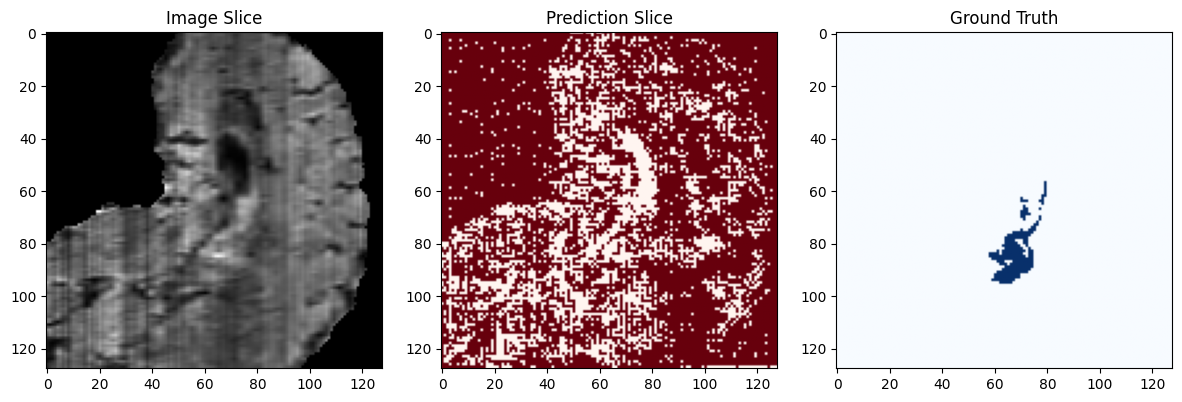

In [ ]:
import torch

# 👇 Get a sample batch from val_loader
sample = next(iter(val_loader))

# 🔍 Print the type and keys in the sample
print(f"Sample type: {type(sample)}")
print(f"Sample keys: {sample.keys()}")

# ✅ Based on the keys, access image and label (example assumes 'image' and 'label')
image = sample['image'].to(device)   # [1, 1, D, H, W]
label = sample['label'].to(device)   # [1, D, H, W] or [1, 1, D, H, W]

# 🔻 Optional: If label shape is [1, D, H, W], add a channel
if label.ndim == 4:
    label = label.unsqueeze(1)

# 📌 Run the model prediction
with torch.no_grad():
    output = model(image)
    pred = torch.argmax(output, dim=1, keepdim=True)  # [1, 1, D, H, W]

# 🔍 Visualize slice from 3D volume
def show_prediction(image, pred, label, slice_idx=60):
    import matplotlib.pyplot as plt

    # Remove batch and channel dims: [1, 1, D, H, W] -> [D, H, W]
    image = image.squeeze().cpu().numpy()
    pred = pred.squeeze().cpu().numpy()
    label = label.squeeze().cpu().numpy()

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.imshow(image[slice_idx], cmap="gray")
    plt.title("Image Slice")

    plt.subplot(1, 3, 2)
    plt.imshow(pred[slice_idx], cmap="Reds")
    plt.title("Prediction Slice")

    plt.subplot(1, 3, 3)
    plt.imshow(label[slice_idx], cmap="Blues")
    plt.title("Ground Truth")

    plt.tight_layout()
    plt.show()

# 🔁 Call the visualization
show_prediction(image, pred, label, slice_idx=60)


DATASET 2

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewmvd/lits-png")

print("Path to dataset files:", path)


100%|██████████| 3.40G/3.40G [01:27<00:00, 41.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/andrewmvd/lits-png/versions/6


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import shutil

src_path = "/root/.cache/kagglehub/datasets/andrewmvd/lits-png/versions/6"
dst_path = "/content/drive/MyDrive/LiTS_PNG"

shutil.copytree(src_path, dst_path)
print("✅ Dataset copied to Google Drive.")


FileExistsError: [Errno 17] File exists: '/content/drive/MyDrive/LiTS_PNG'

In [ ]:
import os
import nibabel as nib
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [ ]:
class MedicalImageDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.image_filenames = sorted([f for f in os.listdir(image_dir) if f.endswith(".nii.gz")])
        self.mask_filenames = sorted([f for f in os.listdir(mask_dir) if f.endswith(".nii.gz")])
        self.transform = transform

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.image_filenames[idx])
        mask_path = os.path.join(self.mask_dir, self.mask_filenames[idx])

        image = nib.load(img_path).get_fdata().astype(np.float32)
        mask = nib.load(mask_path).get_fdata().astype(np.float32)

        # Normalize image
        image = (image - np.mean(image)) / np.std(image)

        # Resize or slice (simplified: take center slice if 3D)
        image = image[:, :, image.shape[2] // 2]
        mask = mask[:, :, mask.shape[2] // 2]

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return torch.tensor(image).unsqueeze(0), torch.tensor(mask).unsqueeze(0)


In [ ]:
train_images_dir = "/content/drive/MyDrive/LiTS_PNG/train/images"
train_masks_dir  = "/content/drive/MyDrive/LiTS_PNG/train/masks"

val_images_dir   = "/content/drive/MyDrive/LiTS_PNG/val/images"
val_masks_dir    = "/content/drive/MyDrive/LiTS_PNG/val/masks"


In [ ]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset
import torchvision.transforms as T

class LiverPNGDataloader(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_paths = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir)])
        self.mask_paths = sorted([os.path.join(mask_dir, f) for f in os.listdir(mask_dir)])
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert("L")
        mask = Image.open(self.mask_paths[idx]).convert("L")

        image = T.ToTensor()(image)  # [1, H, W]
        mask = T.ToTensor()(mask).long()  # [1, H, W]

        # Optional: Add normalization, augmentation, resizing
        if self.transform:
            image = self.transform(image)

        # Add a dummy depth for 3D-style compatibility
        image = image.unsqueeze(1).repeat(1, 128, 1)  # -> [1, D, H]
        mask = mask.unsqueeze(1).repeat(1, 128, 1)

        return {"image": image, "label": mask}


In [ ]:
train_images_dir = "/content/drive/MyDrive/LiTS_PNG/dataset_6/dataset_6/images"
train_masks_dir  = "/content/drive/MyDrive/LiTS_PNG/dataset_6/dataset_6/masks"

val_images_dir   = "/content/drive/MyDrive/LiTS_PNG/dataset_6/dataset_6/images"  # Use same if no separate val
val_masks_dir    = "/content/drive/MyDrive/LiTS_PNG/dataset_6/dataset_6/masks"


In [ ]:
import matplotlib.pyplot as plt

def compare_segmentation_results(brats_image, brats_pred, brats_label,
                                  liver_image, liver_pred, liver_label,
                                  slice_idx=60):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    # BraTS Row
    axes[0, 0].imshow(brats_image[slice_idx], cmap='gray')
    axes[0, 0].set_title('BraTS: Image')
    axes[0, 1].imshow(brats_pred[slice_idx], cmap='Reds')
    axes[0, 1].set_title('BraTS: Prediction')
    axes[0, 2].imshow(brats_label[slice_idx], cmap='Blues')
    axes[0, 2].set_title('BraTS: Ground Truth')

    # MSD Liver Row
    axes[1, 0].imshow(liver_image[slice_idx], cmap='gray')
    axes[1, 0].set_title('Liver: Image')
    axes[1, 1].imshow(liver_pred[slice_idx], cmap='Reds')
    axes[1, 1].set_title('Liver: Prediction')
    axes[1, 2].imshow(liver_label[slice_idx], cmap='Blues')
    axes[1, 2].set_title('Liver: Ground Truth')

    for ax in axes.flatten():
        ax.axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
brats_val_images_dir = "/content/drive/MyDrive/BraTS2020_Small/dataset/val/images"
brats_val_masks_dir  = "/content/drive/MyDrive/BraTS2020_Small/dataset/val/masks"

brats_val_dataset = NPY3DDataset(brats_val_images_dir, brats_val_masks_dir)
brats_val_loader  = DataLoader(brats_val_dataset, batch_size=1, shuffle=False)



NameError: name 'NPY3DDataset' is not defined

In [ ]:
class NPY3DDataset(torch.utils.data.Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_paths = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.npy')])
        self.mask_paths  = sorted([os.path.join(mask_dir, f)  for f in os.listdir(mask_dir)  if f.endswith('.npy')])
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = np.load(self.image_paths[idx])        # shape: (128, 128, 128, 3)
        mask  = np.load(self.mask_paths[idx])         # shape: (128, 128, 128, 4)

        # Simplify image (e.g., use channel 0 only)
        image = image[..., 0]
        mask = np.argmax(mask, axis=-1)               # convert from one-hot to int
        mask = (mask > 0).astype(np.uint8)            # binary: 0 (bg), 1 (tumor)

        image = np.expand_dims(image, axis=0)         # shape: (1, 128, 128, 128)
        mask  = np.expand_dims(mask, axis=0)

        return torch.tensor(image, dtype=torch.float32), torch.tensor(mask, dtype=torch.long)


In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [ ]:
# ⏩ Get 1 BraTS sample and predict
brats_sample = next(iter(brats_val_loader))
brats_image = brats_sample['image'].to(device)  # [1, 1, D, H, W]
brats_label = brats_sample['label'].to(device)  # [1, D, H, W]
   # [1, D, H, W]

with torch.no_grad():
    brats_output = model(brats_image)           # [1, 2, D, H, W]
    brats_pred   = torch.argmax(brats_output, dim=1)  # [1, D, H, W]

# Convert to numpy
brats_image_np = brats_image.squeeze().cpu().numpy()   # [D, H, W]
brats_label_np = brats_label.squeeze().cpu().numpy()
brats_pred_np  = brats_pred.squeeze().cpu().numpy()


NameError: name 'brats_val_loader' is not defined

In [ ]:
import os
import nibabel as nib
import torch
from torch.utils.data import Dataset
from torchvision import transforms

class BraTSDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        # Assuming the images and labels are in separate folders
        self.images = sorted(os.listdir(os.path.join(root_dir, 'images')))
        self.labels = sorted(os.listdir(os.path.join(root_dir, 'labels')))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        # Load the image and label
        img_path = os.path.join(self.root_dir, 'images', self.images[idx])
        label_path = os.path.join(self.root_dir, 'labels', self.labels[idx])

        image = nib.load(img_path).get_fdata()  # Using nibabel to load NIfTI images
        label = nib.load(label_path).get_fdata()

        # Convert to tensor and apply transformations if any
        if self.transform:
            image = self.transform(image)
            label = torch.tensor(label, dtype=torch.long)  # Ensure the label is an integer tensor

        return {'image': image, 'label': label}


In [ ]:
import os
import nibabel as nib
import torch
from torch.utils.data import Dataset
from torchvision import transforms

class BraTSDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir  # Store root_dir as a class variable
        self.transform = transform
        # Assuming images and labels are in separate 'images' and 'labels' folders
        self.images = sorted(os.listdir(os.path.join(self.root_dir, 'images')))
        self.labels = sorted(os.listdir(os.path.join(self.root_dir, 'labels')))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        # Load the image and label
        img_path = os.path.join(self.root_dir, 'images', self.images[idx])
        label_path = os.path.join(self.root_dir, 'labels', self.labels[idx])

        image = nib.load(img_path).get_fdata()  # Using nibabel to load NIfTI images
        label = nib.load(label_path).get_fdata()

        # Convert to tensor and apply transformations if any
        if self.transform:
            image = self.transform(image)
            label = torch.tensor(label, dtype=torch.long)  # Ensure the label is an integer tensor

        return {'image': image, 'label': label}


In [ ]:
from torch.utils.data import DataLoader
from torchvision import transforms

# Define any necessary transformations (e.g., normalization, resizing, etc.)
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    # Add more transformations as needed (e.g., resizing, normalization)
])

# Initialize the BraTS validation dataset
brats_val_dataset = BraTSDataset(root_dir='/full/path/to/brats/validation', transform=transform)

# Create the validation data loader
brats_val_loader = DataLoader(brats_val_dataset, batch_size=1, shuffle=False)

# Now you can iterate over the data loader in your prediction loop


FileNotFoundError: [Errno 2] No such file or directory: '/full/path/to/brats/validation/images'

In [ ]:
self.images = sorted(os.listdir(root_dir))
self.labels = sorted(os.listdir(root_dir))


NameError: name 'root_dir' is not defined

In [ ]:
from torch.utils.data import DataLoader
from torchvision import transforms

# Define any necessary transformations (e.g., normalization, resizing, etc.)
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    # Add more transformations as needed (e.g., resizing, normalization)
])

# Initialize the BraTS validation dataset
brats_val_dataset = BraTSDataset(root_dir='/root/.cache/kagglehub/datasets/loco159/brats2020-small-dataset/versions/1/dataset/val', transform=transform)

# Create the validation data loader
brats_val_loader = DataLoader(brats_val_dataset, batch_size=1, shuffle=False)

# Now you can iterate over the data loader in your prediction loop


FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/kagglehub/datasets/loco159/brats2020-small-dataset/versions/1/dataset/val/images'

In [ ]:
path = "/root/.cache/kagglehub/datasets/loco159/brats2020-small-dataset/versions/1/dataset"


In [ ]:
import os

print(os.listdir(path))  # This will list files in the directory


FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/kagglehub/datasets/loco159/brats2020-small-dataset/versions/1/dataset'

In [ ]:
from torch.utils.data import DataLoader
from your_custom_dataset import BraTSDataset  # Replace with your actual Dataset class
from torchvision import transforms

# Define any necessary transformations (e.g., normalization, resizing, etc.)
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    # Add more transformations as needed (e.g., normalization)
])

# Initialize the BraTS validation dataset
brats_val_dataset = BraTSDataset(root_dir='path/to/brats/validation', transform=transform)

# Create the validation data loader
brats_val_loader = DataLoader(brats_val_dataset, batch_size=1, shuffle=False)

# Now you can iterate over the data loader in your prediction loop


ModuleNotFoundError: No module named 'your_custom_dataset'

In [ ]:
!ls /root/.cache/kagglehub/datasets


andrewmvd
